In [29]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


In [30]:
img = cv2.imread('asd.jpg')
small = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
small_rgb = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)


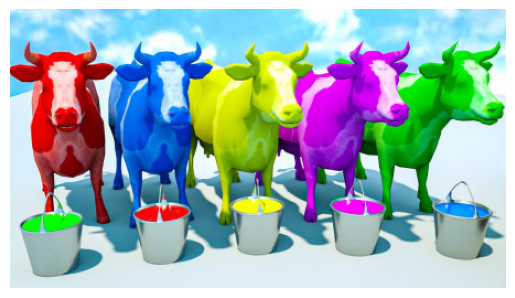

In [31]:
plt.imshow(small_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [32]:
w, l, c = small_rgb.shape
dataset = list()
for i in range(w):
    for j in range(l):
        dataset.append(small_rgb[i][j])



In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [34]:
compressed_image = np.zeros_like(dataset)
for i in range(len(dataset)):
    compressed_image[i] = cluster_centers[labels[i]]

compressed_image = compressed_image.reshape((w, l, c))

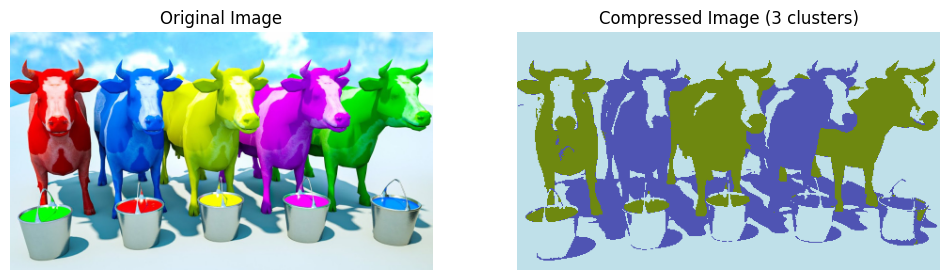

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(small_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(compressed_image)
axes[1].set_title("Image ({} clusters)".format(3))
axes[1].axis('off')
plt.show()